<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_5-Weekend-Project/Copy_of_01_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [1]:
import pandas as pd

raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


In [2]:
df.shape

(6338, 21)

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
import seaborn as sns

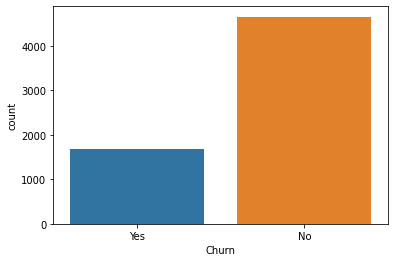

In [5]:
sns.countplot(x='Churn',data=df)

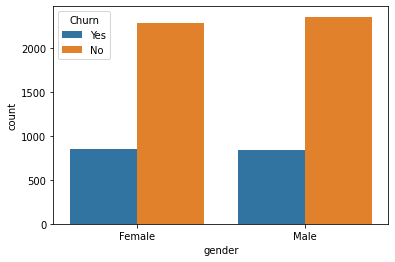

In [6]:
sns.countplot(x='gender',hue='Churn',data=df)

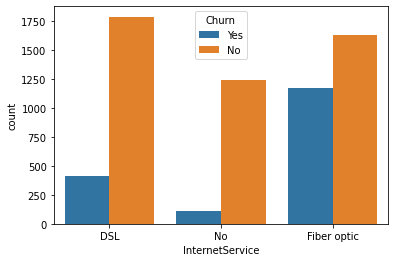

In [7]:
sns.countplot(x='InternetService',hue='Churn',data=df)

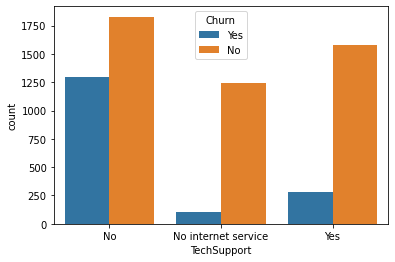

In [8]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

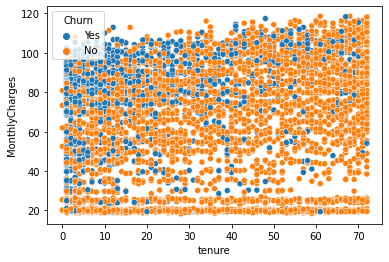

In [9]:
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df,hue='Churn')

## Setting up a simple Logistic Regression
[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

Deleting space value

In [11]:
df.drop(df.loc[df['TotalCharges']==' '].index, inplace=True)


Transforming column type to numaric

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [13]:
df['TotalCharges']

0        669.85
1       1269.10
2       3767.40
3       1021.55
4       1652.95
         ...   
6333    3440.25
6334     137.10
6335    8547.15
6336    5683.60
6337    6562.90
Name: TotalCharges, Length: 6330, dtype: float64

Replacing "Yes" , "No" to (1,0)

In [14]:
df['Churn'] = df['Churn'].replace(['Yes','No'],[1,0])

In [15]:
df['Churn']

0       1
1       0
2       0
3       0
4       0
       ..
6333    0
6334    0
6335    0
6336    0
6337    0
Name: Churn, Length: 6330, dtype: int64

In [16]:
dum=pd.get_dummies(df.iloc[:,1:20])

In [17]:
dum

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,18,39.05,669.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,0,66,19.95,1269.10,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,39,99.95,3767.40,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0,10,95.25,1021.55,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,27,56.70,1652.95,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,36,95.00,3440.25,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
6334,0,2,80.45,137.10,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6335,0,72,118.20,8547.15,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6336,1,68,84.65,5683.60,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split

X = dum
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


Fit the model...

Note: I skipped a step in setting up the data...

In [19]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions...

In [20]:
preds=model.predict(X_test)
preds

array([0, 1, 0, ..., 0, 1, 1])

From here you'd...

1. Figure our your precision, recall, score, etc..
2. Make it into a pipeline... ([Docs Help](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) | [Basic Skeleton Code Help](https://github.com/gumdropsteve/intro_to_machine_learning/blob/main/day_03/02_assignment.ipynb))
3. Figure out your best hyperparams (GridSearchCV)...
4. Make that model...
5. ...

In [21]:
from sklearn.metrics import *

In [22]:
accuracy_score(y_test,preds)

0.8120063191153238

In [23]:
precision_score(y_test,preds)

0.6771844660194175

In [24]:
recall_score(y_test,preds)

0.5546719681908548

In [25]:

r2_score(y_test,preds)


0.034527790278386816

In [26]:
from sklearn.model_selection import cross_val_score


cross_val_score(model, X, y)

array([0.80805687, 0.7985782 , 0.81042654, 0.80015798, 0.79699842])

In [27]:
mean_squared_error(y_true=y_test, y_pred=preds)

0.18799368088467613

In [28]:


cross_val_score(model, X, y, scoring='r2')



array([ 0.01921164, -0.02922235,  0.03132014, -0.02307768, -0.03925283])

In [29]:
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))
param_grid = {'logisticregression__dual': [True, False],
              'logisticregression__multi_class': ['auto']}

grid = GridSearchCV(LR(), param_grid, cv=7)

In [31]:
grid.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [32]:
grid.best_params_

{'logisticregression__dual': False, 'logisticregression__multi_class': 'auto'}

## Ideas:
In this section I will give three recommendations to help the company to decrease the number of churn.


1- I noticed that most of leaving costomers left early if their monthly charges are high. I think the company should follow with new coustomers for the first five months to insure the customer are satisfying of the monthly charge or he will have an offer with discount.


2- It seems that the company provide a good tichnical support and that reflect on the customer churn, as the customer are willing to stay more if he or she has a ticnical support. for that I recommend the company to ask the costomer in monthly basis if he needs a tichnical support.

3- it is obvious that the company has an issue with the fiver optic service, a lot of customers left if they have this service.